In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_mood_smartphone.csv')

# 1 EXPLORATORY DATA ANALYSIS
TASK 1A: Exploratory Data Analysis 

In [3]:
print("how many records are there? "+str(len(df)))
attributes = df.variable.unique()
print("how many attributes? "+str(len(attributes)))
users = df.id.unique()
print("how many users? "+str(len(users)))

df['date'] = pd.to_datetime(df['time']).dt.date
days = df['date'].unique()
print("how many days? "+str(len(days)))

descriptions = {}
for variable in attributes:
    descriptions[variable] = df[df['variable'] == variable]['value'].describe()
description_df = pd.DataFrame(descriptions).T
description_df

how many records are there? 376912
how many attributes? 19
how many users? 27
how many days? 113


,count,mean,std,min,25%,50%,75%,max
mood,5641.0,6.992555,1.032769,1.000,7.00000,7.000000,8.000000,10.000
circumplex.arousal,5597.0,-0.098624,1.051868,-2.000,-1.00000,0.000000,1.000000,2.000
circumplex.valence,5487.0,0.687808,0.671298,-2.000,0.00000,1.000000,1.000000,2.000
activity,22965.0,0.115958,0.186946,0.000,0.00000,0.021739,0.158333,1.000
screen,96578.0,75.335206,253.822497,0.035,5.32225,20.044500,62.540250,9867.007
call,5239.0,1.000000,0.000000,1.000,1.00000,1.000000,1.000000,1.000
sms,1798.0,1.000000,0.000000,1.000,1.00000,1.000000,1.000000,1.000
appCat.builtin,91288.0,18.538262,415.989243,-82798.871,2.02000,4.038000,9.922000,33960.246
appCat.communication,74276.0,43.343792,128.912750,0.006,5.21800,16.225500,45.475750,9830.777
appCat.entertainment,27125.0,37.576480,262.960476,-0.011,1.33400,3.391000,14.922000,32148.677


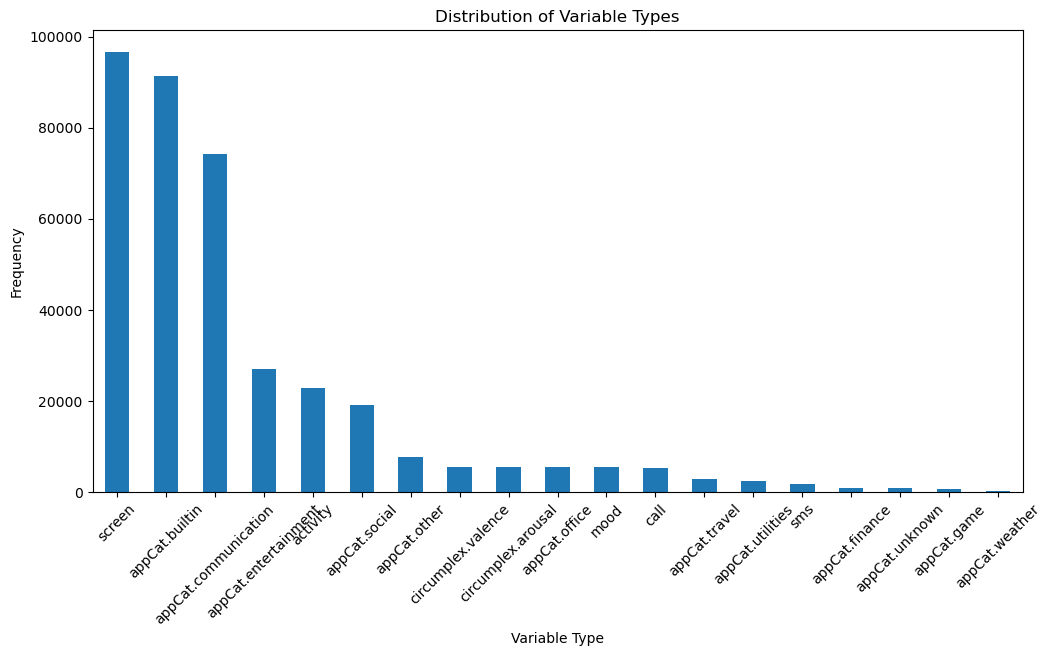

variable
screen                  96578
appCat.builtin          91288
appCat.communication    74276
appCat.entertainment    27125
activity                22965
appCat.social           19145
appCat.other             7650
circumplex.valence       5643
circumplex.arousal       5643
appCat.office            5642
mood                     5641
call                     5239
appCat.travel            2846
appCat.utilities         2487
sms                      1798
appCat.finance            939
appCat.unknown            939
appCat.game               813
appCat.weather            255
Name: count, dtype: int64

In [4]:
variable_counts = df['variable'].value_counts()

plt.figure(figsize=(12, 6))
variable_counts.plot(kind='bar')
plt.title('Distribution of Variable Types')
plt.xlabel('Variable Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

variable_counts

In [5]:
unique_days_per_user = df.groupby('id')['date'].nunique().reset_index(name='unique_days_count')
unique_days_per_user

,id,unique_days_count
0,AS14.01,72
1,AS14.02,68
2,AS14.03,77
3,AS14.05,70
4,AS14.06,74
5,AS14.07,50
6,AS14.08,67
7,AS14.09,71
8,AS14.12,67
9,AS14.13,72


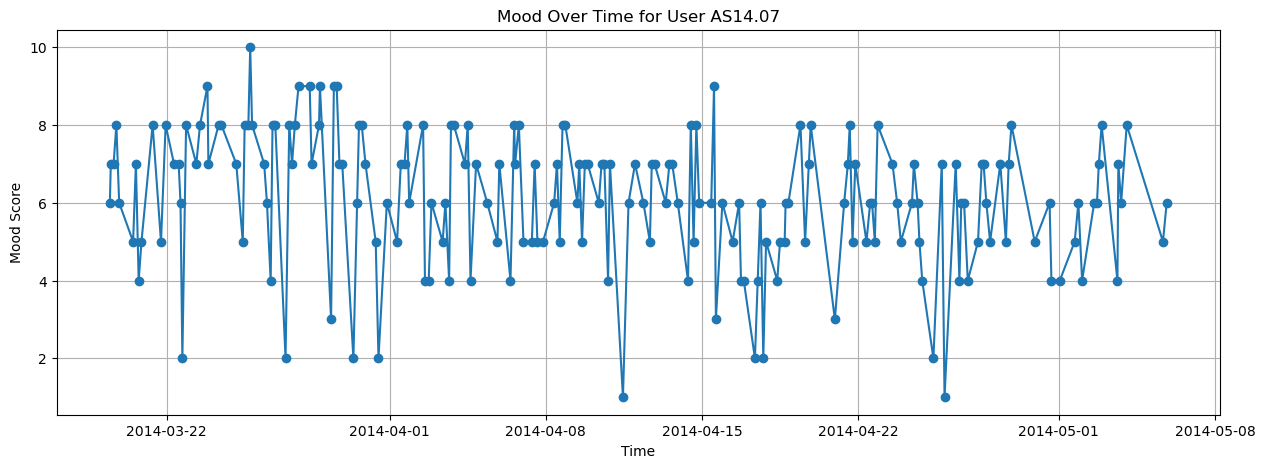

In [6]:
df['time'] = pd.to_datetime(df['time'])
mood_data = df[df['variable'] == 'mood']

sample_user = mood_data['id'].unique()[5]
sample_user_mood = mood_data[mood_data['id'] == sample_user]

plt.figure(figsize=(15, 5))
plt.plot(sample_user_mood['time'], sample_user_mood['value'], marker='o', linestyle='-')
plt.title(f'Mood Over Time for User {sample_user}')
plt.xlabel('Time')
plt.ylabel('Mood Score')
plt.grid(True)
plt.show()

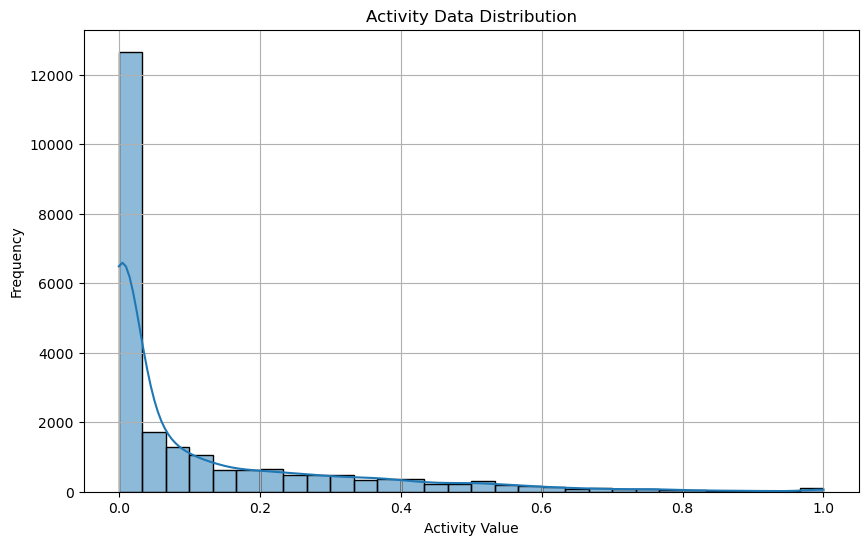

In [7]:
act = df[df['variable'] == 'activity']['value']
plt.figure(figsize=(10, 6))
sns.histplot(act, bins=30, kde=True)
plt.title('Activity Data Distribution')
plt.xlabel('Activity Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

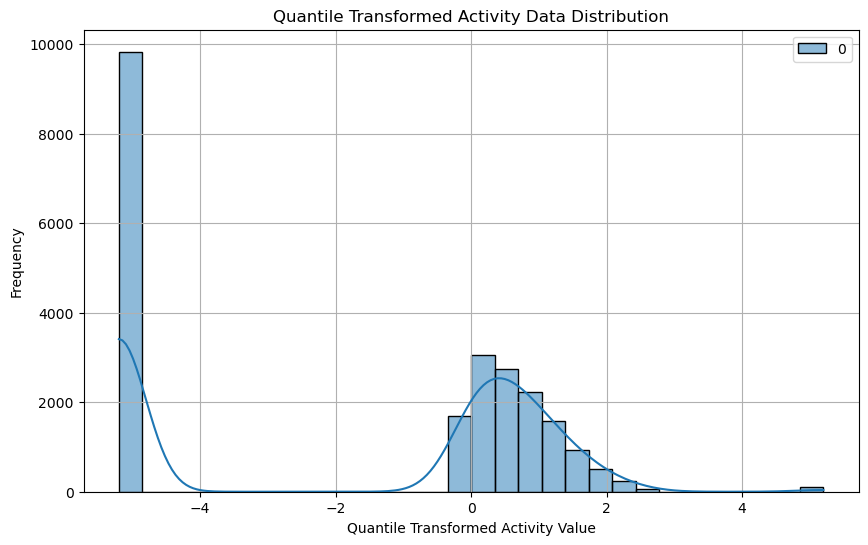

In [8]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal', n_quantiles=1000, random_state=0)
act_quantile_transformed = qt.fit_transform(act.values.reshape(-1, 1))

plt.figure(figsize=(10, 6))
sns.histplot(act_quantile_transformed, bins=30, kde=True)
plt.title('Quantile Transformed Activity Data Distribution')
plt.xlabel('Quantile Transformed Activity Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [9]:
screen_data = df[df['variable'] == 'screen']
appCat_data = df[df['variable'].str.contains('appCat')]

specific_user = 'AS14.01'
specific_date = '2014-03-21'

# Filtering data for the specific user and date
screen_data_user = screen_data[(screen_data['id'] == specific_user) & (screen_data['time'].dt.date == pd.to_datetime(specific_date).date())]
appCat_data_user = appCat_data[(appCat_data['id'] == specific_user) & (appCat_data['time'].dt.date == pd.to_datetime(specific_date).date())]

# Summing the values for that specific day
screen_time_sum_user = screen_data_user['value'].sum()
appCat_time_sum_user = appCat_data_user['value'].sum()

specific_user, specific_date, screen_time_sum_user, appCat_time_sum_user


('AS14.01', '2014-03-21', 17978.907000064843, 16911.764)

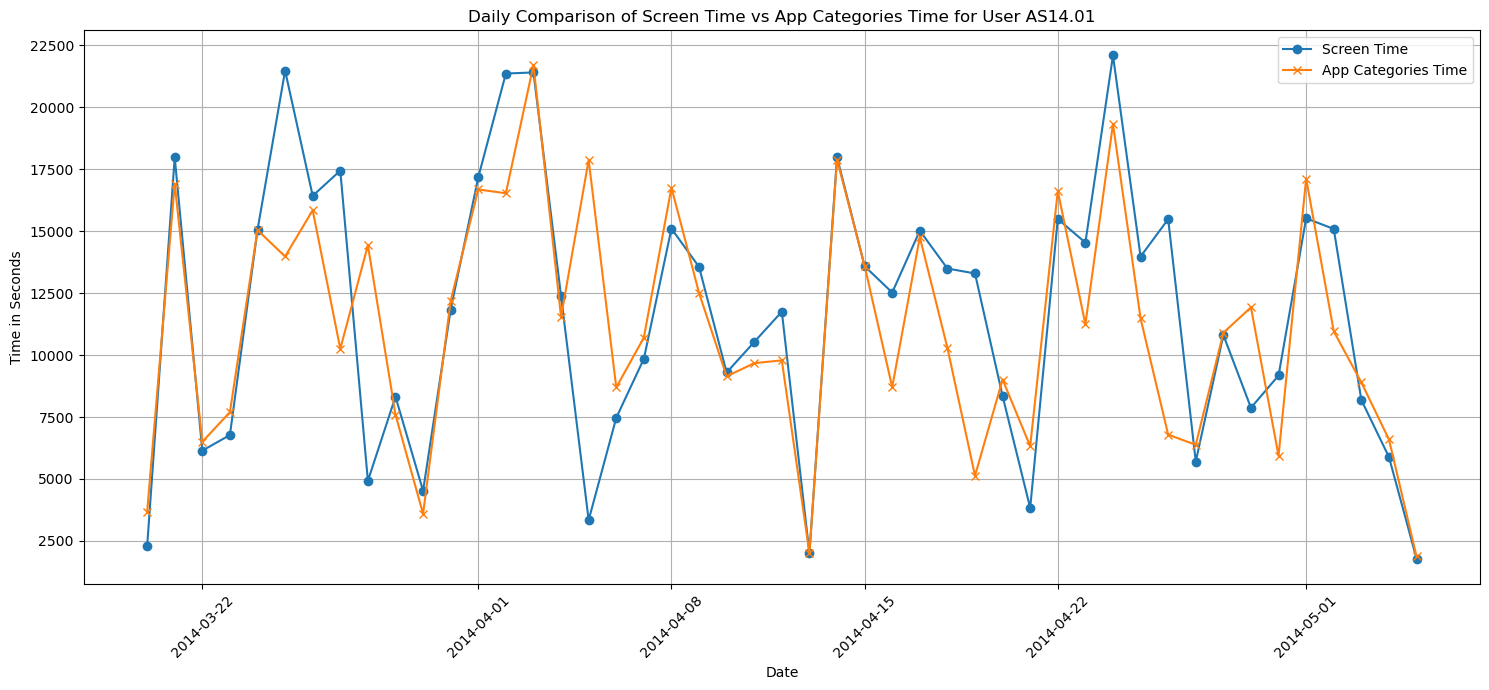

In [10]:
# Filtering data for the specific user
screen_data_specific_user = screen_data[screen_data['id'] == specific_user]
appCat_data_specific_user = appCat_data[appCat_data['id'] == specific_user]

# Grouping by date and summing the values
screen_time_daily = screen_data_specific_user.groupby(screen_data_specific_user['time'].dt.date)['value'].sum().reset_index(name='screen_sum')
appCat_time_daily = appCat_data_specific_user.groupby(appCat_data_specific_user['time'].dt.date)['value'].sum().reset_index(name='appCat_sum')

# Merging the daily sums
daily_comparison = pd.merge(screen_time_daily, appCat_time_daily, on='time', how='outer').fillna(0)  # Fill missing days with 0

# Plotting the daily sums comparison
plt.figure(figsize=(15, 7))
plt.plot(daily_comparison['time'], daily_comparison['screen_sum'], label='Screen Time', marker='o')
plt.plot(daily_comparison['time'], daily_comparison['appCat_sum'], label='App Categories Time', marker='x')
plt.title(f'Daily Comparison of Screen Time vs App Categories Time for User {specific_user}')
plt.xlabel('Date')
plt.ylabel('Time in Seconds')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

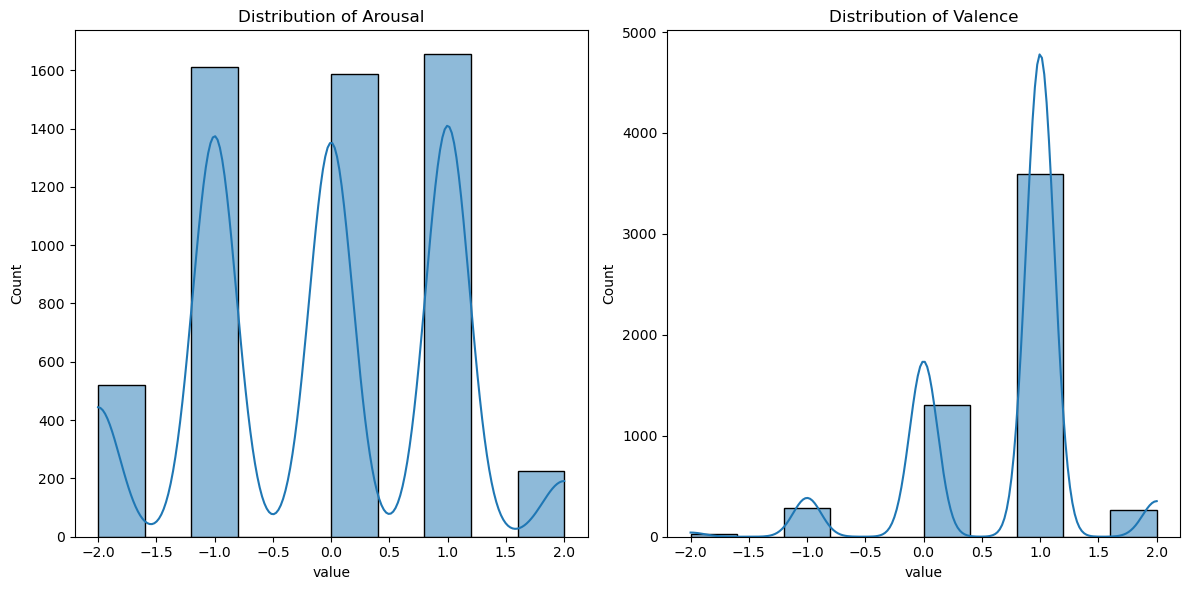

In [11]:
arousal_data = df[df['variable'] == 'circumplex.arousal']
valence_data = df[df['variable'] == 'circumplex.valence']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(arousal_data['value'], kde=True, bins=10)
plt.title('Distribution of Arousal')

plt.subplot(1, 2, 2)
sns.histplot(valence_data['value'], kde=True, bins=10)
plt.title('Distribution of Valence')

plt.tight_layout()
plt.show()

## Investigate on Missing Value 

In [12]:
missing_values_by_variable = df[df['value'].isnull()].groupby('variable').size()

missing_values_by_variable_stats = pd.DataFrame({
    'Variable': missing_values_by_variable.index,
    'Missing Values': missing_values_by_variable.values
})
missing_values_by_variable_stats


,Variable,Missing Values
0,circumplex.arousal,46
1,circumplex.valence,156


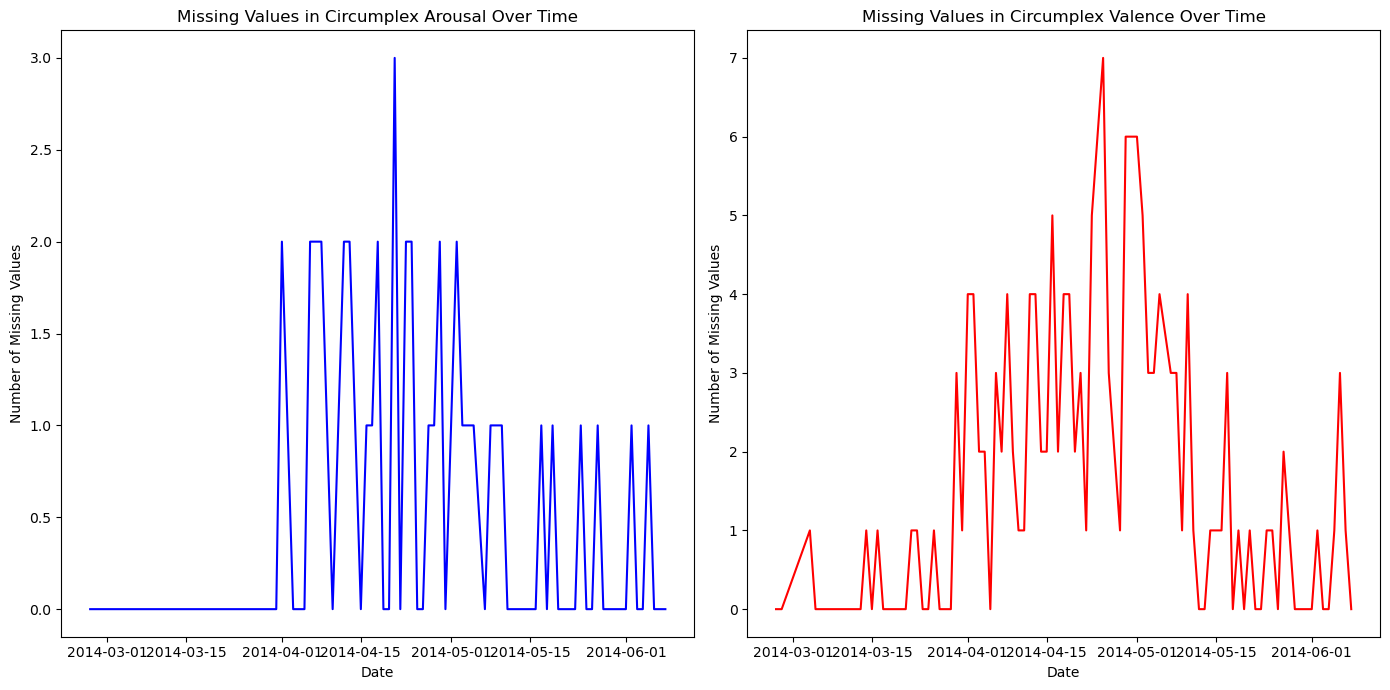

In [13]:
# Filtering the data for the two variables and checking for missing values
arousal_missing = df[df['variable'] == 'circumplex.arousal'].copy()
valence_missing = df[df['variable'] == 'circumplex.valence'].copy()

# Marking missing values with 1 and non-missing with 0
arousal_missing['is_missing'] = arousal_missing['value'].isnull().astype(int)
valence_missing['is_missing'] = valence_missing['value'].isnull().astype(int)

# Converting time to datetime for better handling
arousal_missing['time'] = pd.to_datetime(arousal_missing['time'])
valence_missing['time'] = pd.to_datetime(valence_missing['time'])

# Aggregating missing values by date
arousal_missing_by_date = arousal_missing.groupby(arousal_missing['time'].dt.date)['is_missing'].sum()
valence_missing_by_date = valence_missing.groupby(valence_missing['time'].dt.date)['is_missing'].sum()

# Plotting the time series of missing values for both variables
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
arousal_missing_by_date.plot(title='Missing Values in Circumplex Arousal Over Time', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')

plt.subplot(1, 2, 2)
valence_missing_by_date.plot(title='Missing Values in Circumplex Valence Over Time', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')

plt.tight_layout()
plt.show()


In [14]:
arousal_missing[arousal_missing["is_missing"]==1]

,Unnamed: 0,id,time,variable,value,date,is_missing
5708,5709,AS14.01,2014-04-02 18:00:00,circumplex.arousal,NaN,2014-04-02,1
5730,5731,AS14.01,2014-04-07 15:00:00,circumplex.arousal,NaN,2014-04-07,1
5772,5773,AS14.01,2014-04-16 12:00:00,circumplex.arousal,NaN,2014-04-16,1
5796,5797,AS14.01,2014-04-21 13:00:00,circumplex.arousal,NaN,2014-04-21,1
5835,5836,AS14.01,2014-04-29 09:00:00,circumplex.arousal,NaN,2014-04-29,1
6324,6325,AS14.05,2014-04-01 19:00:00,circumplex.arousal,NaN,2014-04-01,1
6378,6379,AS14.05,2014-04-13 13:00:00,circumplex.arousal,NaN,2014-04-13,1
6433,6434,AS14.05,2014-04-24 18:00:00,circumplex.arousal,NaN,2014-04-24,1
6667,6668,AS14.06,2014-05-02 10:00:00,circumplex.arousal,NaN,2014-05-02,1
6792,6793,AS14.07,2014-04-12 00:00:00,circumplex.arousal,NaN,2014-04-12,1


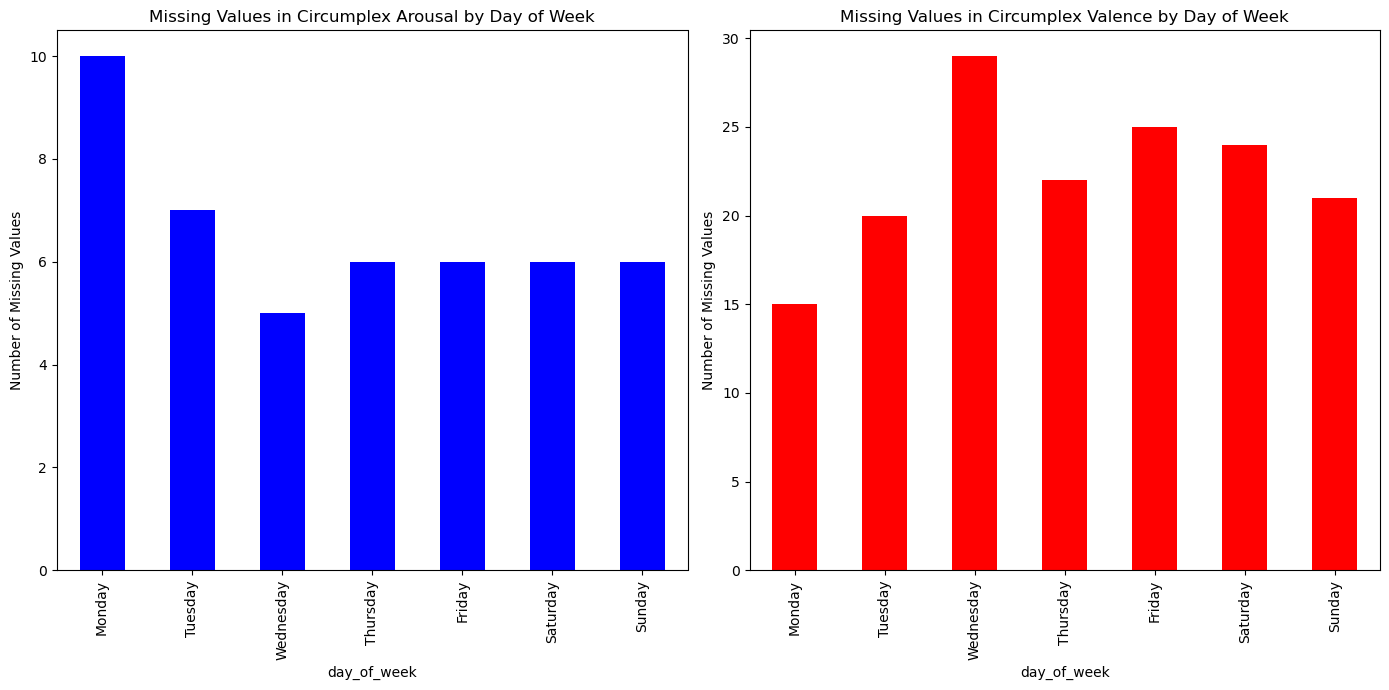

In [15]:
df['time'] = pd.to_datetime(df['time'])
df['day_of_week'] = df['time'].dt.dayofweek

arousal_data = df.loc[df['variable'] == 'circumplex.arousal', :].copy()
valence_data = df.loc[df['variable'] == 'circumplex.valence', :].copy()

arousal_data.loc[:, 'is_missing'] = arousal_data['value'].isnull().astype(int)
valence_data.loc[:, 'is_missing'] = valence_data['value'].isnull().astype(int)

arousal_missing_by_day = arousal_data.groupby('day_of_week')['is_missing'].sum()
valence_missing_by_day = valence_data.groupby('day_of_week')['is_missing'].sum()

days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
arousal_missing_by_day.index = arousal_missing_by_day.index.map(days_of_week)
valence_missing_by_day.index = valence_missing_by_day.index.map(days_of_week)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
arousal_missing_by_day.plot(kind='bar', color='blue')
plt.title('Missing Values in Circumplex Arousal by Day of Week')
plt.ylabel('Number of Missing Values')

plt.subplot(1, 2, 2)
valence_missing_by_day.plot(kind='bar', color='red')
plt.title('Missing Values in Circumplex Valence by Day of Week')
plt.ylabel('Number of Missing Values')

plt.tight_layout()
plt.show()

**Question: Should we fill in the missing values now, or should we wait until after we have aggregated the values by day?**

If your data analysis focuses on utilizing the dynamics of time series (such as studying intra-day patterns or trends), it might make more sense to fill in missing values after aggregating to daily values. Doing so can take advantage of intra-day data characteristics, which may be more consistent with the actual situation.
If the focus of the analysis is on overall trends or patterns over time, and you are less sensitive to the specifics of daily dynamics, then you might consider filling in missing values now to facilitate broader data exploration and analysis.

Decision: Fill in now. Because we are not too concerned about intra-day dynamics.

Given that we are dealing with mood data, which may have certain trends or seasonal variations over time, using time series interpolation methods might be a good choice. For example, we could use linear interpolation or interpolation based on adjacent time points.

In [16]:
df.loc[df['variable'] == 'circumplex.arousal', 'value'] = df.loc[df['variable'] == 'circumplex.arousal', 'value'].interpolate(method='linear')
df.loc[df['variable'] == 'circumplex.valence', 'value'] = df.loc[df['variable'] == 'circumplex.valence', 'value'].interpolate(method='linear')
remaining_missing_arousal = df[df['variable'] == 'circumplex.arousal']['value'].isnull().sum()
remaining_missing_valence = df[df['variable'] == 'circumplex.valence']['value'].isnull().sum()

print('Remaining missing values in Circumplex Arousal:', remaining_missing_arousal)
print('Remaining missing values in Circumplex Valence:', remaining_missing_valence)

Remaining missing values in Circumplex Arousal: 0
Remaining missing values in Circumplex Valence: 0


## Investigate Missing Value

In [17]:
expected_ranges = {
    'mood': (1, 10),
    'circumplex.arousal': (-2, 2),
    'circumplex.valence': (-2, 2),
    'activity': (0, 1),
    'call': (0, 1),
    'sms': (0, 1)
}

app_cat_columns = [col for col in df['variable'].unique() if col.startswith('appCat.')]

def check_out_of_range(data, var, var_range):
    return data[(data['variable'] == var) &
                ((data['value'] < var_range[0]) | (data['value'] > var_range[1]))]

out_of_range_records = {}

# Checking the defined variables with expected ranges
for variable, value_range in expected_ranges.items():
    out_of_range_records[variable] = check_out_of_range(df, variable, value_range)

# Checking the app category variables for negative values
for variable in app_cat_columns:
    out_of_range_records[variable] = df[(df['variable'] == variable) & (df['value'] < 0)]

# Output the results
out_of_range_summary = {variable: len(records) for variable, records in out_of_range_records.items() if len(records) > 0}
out_of_range_summary


{'appCat.builtin': 3, 'appCat.entertainment': 1}

In [18]:
df = df.drop(df[(df['variable'].str.startswith('appCat')) & (df['value'] < 0)].index)

remaining_negative_values = df[(df['variable'].str.startswith('appCat')) & (df['value'] < 0)].shape[0]
remaining_negative_values, df.shape


(0, (376908, 7))

In [19]:
from scipy.stats import shapiro

# Define a function to plot histograms and conduct Shapiro-Wilk test
def plot_histogram_and_test_normality(data, variable_name):
    positive_data = data[data['value'] > 0]['value']
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data['value'], kde=True)
    plt.title(f'Histogram of {variable_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    shapiro_stat, shapiro_p_value = shapiro(data['value'].sample(min(5000, len(data)), random_state=1))
    
    log_transformed_data = np.log(positive_data)

    plt.subplot(1, 2, 2)
    sns.histplot(log_transformed_data, kde=True)
    plt.title(f'Log-Transformed Histogram of {variable_name}')
    plt.xlabel('Log-Value')
    plt.ylabel('Frequency')
    
    # Shapiro-Wilk test for log-transformed data
    log_shapiro_stat, log_shapiro_p_value = shapiro(log_transformed_data.sample(min(5000, len(log_transformed_data)), random_state=1))
    
    plt.tight_layout()
    plt.show()
    
    return (shapiro_stat, shapiro_p_value), (log_shapiro_stat, log_shapiro_p_value)

time_usage_variables = df[df['variable'].str.startswith('appCat') | (df['variable'] == 'screen')]['variable'].unique()

# normality_tests_results = {}
# for variable in time_usage_variables:
#     normality_tests_results[variable] = plot_histogram_and_test_normality(df[df['variable'] == variable], variable)
# normality_tests_results

In [20]:
df['hour'] = df['time'].dt.hour  # 一天中的小时数
df['weekday'] = df['time'].dt.weekday  # 一周中的天（0=星期一，6=星期日）
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)  # 是否是周末

print(df.head())

   Unnamed: 0       id                time variable  value        date  \
0           1  AS14.01 2014-02-26 13:00:00     mood    6.0  2014-02-26   
1           2  AS14.01 2014-02-26 15:00:00     mood    6.0  2014-02-26   
2           3  AS14.01 2014-02-26 18:00:00     mood    6.0  2014-02-26   
3           4  AS14.01 2014-02-26 21:00:00     mood    7.0  2014-02-26   
4           5  AS14.01 2014-02-27 09:00:00     mood    6.0  2014-02-27   

   day_of_week  hour  weekday  is_weekend  
0            2    13        2           0  
1            2    15        2           0  
2            2    18        2           0  
3            2    21        2           0  
4            3     9        3           0  


## 1.3 Feature Engineering

In [21]:
df['date'] = df['time'].dt.date

daily_mood_average = df[df['variable'] == 'mood'].groupby(['id', 'date'])['value'].mean().reset_index(name='average_mood')
daily_call_sum = df[df['variable'] == 'call'].groupby(['id', 'date'])['value'].sum().reset_index(name='total_calls')
daily_screen_sum = df[df['variable'] == 'screen'].groupby(['id', 'date'])['value'].sum().reset_index(name='total_screen_time')

daily_data = daily_mood_average.merge(daily_call_sum, on=['id', 'date'], how='outer')
daily_data = daily_data.merge(daily_screen_sum, on=['id', 'date'], how='outer')

print(daily_data)

           id        date  average_mood  total_calls  total_screen_time
0     AS14.01  2014-02-17           NaN          2.0                NaN
1     AS14.01  2014-02-18           NaN          1.0                NaN
2     AS14.01  2014-02-19           NaN          7.0                NaN
3     AS14.01  2014-02-20           NaN          2.0                NaN
4     AS14.01  2014-02-22           NaN          2.0                NaN
...       ...         ...           ...          ...                ...
1879  AS14.33  2014-05-27           6.2          1.0        4089.879001
1880  AS14.33  2014-05-28           8.2         10.0       14320.867998
1881  AS14.33  2014-05-29           7.0          5.0        3569.341000
1882  AS14.33  2014-05-30           6.8          4.0        9497.646999
1883  AS14.33  2014-05-31           7.0          NaN                NaN

[1884 rows x 5 columns]


In [22]:
len(df)

376908